# Visualisation

*Author: Fabio Hernandez*

*Last updated: 2020-02-15*

*Location:* https://github.com/airnandez/numpandas

<a href="https://colab.research.google.com/github/airnandez/numpandas/blob/master/notebooks/visualisation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

____ 
## Introduction

The data analysis process often requires visualising the data. The Python ecosystem offers several possibilities for data visualisation, such as [matplotlib](https://matplotlib.org), [bokeh](http://bokeh.pydata.org/en/latest/), [seaborn](https://seaborn.pydata.org), [altair](https://altair-viz.github.io), etc.

In [1]:
%%bash

mkdir -p '../data'
dataset_file='../data/european_union-2019.csv'
if [[ ! -e ${dataset_file} ]]; then
   curl -s -L --output ${dataset_file}  "https://raw.githubusercontent.com/airnandez/numpandas/master/data/european_union-2019.csv"
fi

head -3 ${dataset_file}

﻿country;country_code;capital;accession_date;population;euro_zone_member;immigration;emigration;contribution_to_eu_budget_millions_euro;expenditure_eu_budget_millions_euro
Austria;AT;Vienna;1995-01-01;8858775;TRUE;111801;66144;3277,09735;1952,627788
Belgium;BE;Brussels;1957-03-25;11455519;TRUE;126703;89690;3839,758857;8513,575724


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/european_union-2019.csv', index_col=1, sep=';', decimal=',')
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
BE,Belgium,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
BG,Bulgaria,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910


------
## matplotlib

Reference: https://matplotlib.org

**pandas** is well integrated with matplotlib, so we can quickly produce graphics for exploration purposes:

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.dpi"] = 150

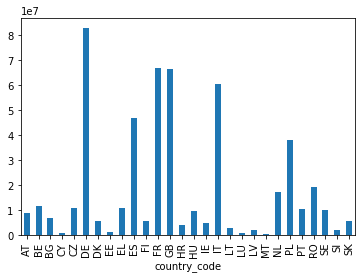

In [5]:
# The simplest possible way of plotting the contents of the 'population' column
df['population'].plot.bar()

The figure above is neither pretty, nor very useful. Let's improve it a bit:

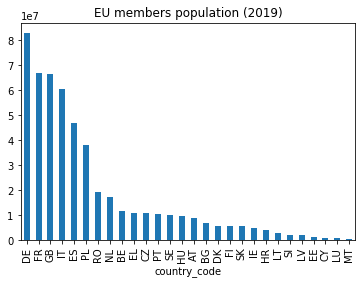

In [6]:
# Sort the values and add a title
df['population'].sort_values(ascending=False).plot.bar(title="EU members population (2019)")

----------
## bokeh

Reference: https://bokeh.pydata.org/en/latest/

In [7]:
import bokeh
import bokeh.plotting
bokeh.plotting.output_notebook()

Loading BokehJS ...

Select the data we want to plot from the dataframe:

In [8]:
# Select the population, in millions, per country
population = (df['population'] / 1_000_000).sort_values(ascending=False)
population.head(3)

country_code
DE    83.019213
FR    67.012883
GB    66.647112
Name: population, dtype: float64

In [9]:
fig1 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
)
fig1.vbar(x=population.index.values, top=population.values, width=0.8)
bokeh.plotting.show(fig1)

Improve the visual attributes of the figure:

In [10]:
fig2 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
    plot_width = 800,
    plot_height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8,
)
fig2.xgrid.grid_line_color = None
fig2.toolbar.autohide = True
fig2.vbar(x=population.index.values, top=population.values, width=0.8, alpha=0.6)
bokeh.plotting.show(fig2)

Now add some interactivity to the figure:

In [11]:
data = bokeh.models.ColumnDataSource({
    'country_code':       population.index.values,
    'country_name':       df.loc[population.index,'country'],
    'country_population': population.values,
})

fig3 = bokeh.plotting.figure(
    title = 'EU members population',
    x_axis_label = 'country code',
    y_axis_label = 'millions',
    x_range = population.index.values,
    plot_width = 800,
    plot_height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8
)
fig3.xgrid.grid_line_color = None
fig3.toolbar.autohide = True
fig3.add_tools(bokeh.models.HoverTool(
    tooltips = [
        ('country',    '@country_name'),
        ('population', '@country_population{0} m'),
    ],
    mode = 'mouse',
))
fig3.vbar(x='country_code', top='country_population', source=data, width=0.8, alpha=0.6, color='LightSeaGreen')

bokeh.plotting.show(fig3)

Another figure with additional customization: use the tooltips to present information not shown grapically

In [12]:
# Net number of individuals who immigrated to each EU country
net_immigration = (df['immigration'] - df['emigration']).sort_values(ascending=False)
net_immigration.head(3)

country_code
DE    356409
GB    284544
IT    188330
dtype: int64

In [13]:
data = bokeh.models.ColumnDataSource({
    'country_code':    net_immigration.index,
    'net_immigration': net_immigration.values,
    'pct_population':  net_immigration.abs() / df.loc[net_immigration.index, 'population'],
    'country_name':    df.loc[net_immigration.index, 'country'],
    'color':           ['LightSeaGreen' if c else 'FireBrick' for c in (net_immigration > 0).values],
})

fig4 = bokeh.plotting.figure(
    title = 'Net immigration to each EU member countries',
    x_axis_label = 'country code',
    y_axis_label = 'individuals',
    x_range = net_immigration.index.values,
    plot_width = 800,
    plot_height = 600,
    background_fill_color = 'whitesmoke',
    background_fill_alpha = 0.8
)
fig4.xgrid.grid_line_color = None
fig4.toolbar.autohide = True
fig4.add_tools(bokeh.models.HoverTool(
    tooltips = [
        ('country',                  '@country_name'),
        ('net immigrants',           '@net_immigration{0,0}'),
        ('percentage of population', '@pct_population{0.00%}'),
    ],
    mode = 'mouse',
))
fig4.yaxis.formatter = bokeh.models.formatters.NumeralTickFormatter(format="0,0")
fig4.vbar(x='country_code', top='net_immigration', source=data, width=0.8, alpha=0.6, color='color')

bokeh.plotting.show(fig4)